### **CAPSTONE PROJECT MODULE 3 (Daegu Apartment Dataset)**
- By Baginda Mirza

[Sumber dataset Daegu Apartment](https://drive.google.com/file/d/1yVH2DQXKdOPCf9b8nV3RO9NXcIt5-gIT/view?usp=sharing)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

### 1.1 Latar Belakang

Daegu adalah kota terbesar ketiga di Korea setelah Seoul dan Busan dengan populasi sekitar 2.5 juta penduduk. Daegu terletak di sebelah tenggara Korea sekitar 80km dari garis pantai, berada diantara sungai Geumho dan sungai Nakdong. Dinobatkan sebagai kota penggerak ekonomi Korea pada tahun 1960-1980, Daegu terkenal dengan industri elektroniknya dan tekstilnya. Dengan iklim subtropis dan lembab sepanjang tahun, komoditas apel menjadi hasil bumi utama yang didistribusi ke seluruh Korea dan luar negeri. 



### 1.2 Problem Statement
Sebagai salah satu dari beberapa kota besar yang berada di Korea, tentunya Daegu menjadi tujuan urbanisasi bagi masyarakat yang tinggal di daerah. Daya tarik kota besar dengan berbagai fasilitas dan tempat dimana banyak terdapat lowongan pekerjaan. **Bisa disimpulkan, mencari apartemen dengan harga dan fasilitas yang sesuai merupakan sebuah tantangan bagi setiap orang, terutama yang tinggal di kota besar.**

### 1.3 Goals

Berdasarkan permasalahan tersebut, tentunya akan sangat mudah jika terdapat 'tool' yang dapat memprediksi serta membantu klien (dalam hal ini seseorang yang sedang mencari apartemen) untuk dapat **memprediksi harga apartemen yang sesuai dengan fasilitas dan parameter lain yang akan mereka beli**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu apartemen, seperti luas unit, tahun dibangun, dan jumlah fasilitas terdekat etc. dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan membantu calon owner untuk mempersiapkan dana yang cukup.

### 1.4 Analytic Approach

Disini kita akan menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu unit apartemen dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang merupakan 'tool' prediksi harga sewa akomodasi yang baru masuk dalam daftar Airbnb, yang mana akan berguna untuk calon owner dan seller dalam menentukan harga jual unit-nya.

### 1.5 Metric Evaluation

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## **2. Data Understanding**

**Features Information**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Hallway space type |
| TimeToSubway | Object | Distance to nearest Subway |
| SubwayStation | Object | Name of Subway station |
| N_FacilitiesNearBy(ETC) | Float | Number of ETC facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of public office nearby |
| N_SchoolNearBy(University) | Float | Number of university nearby |
| N_Parkinglot(Basement) | Float | Size of parking lot by sqf |
| YearBuilt | Integer | Year built of the apartment unit |
| N_FacilitiesInApt | Integer | Number of facilities in Apt |
| Size(sqf) | Integer | Size of apartment unit in sqf |
| SalePrice | Integer | Price of apartment unit in dollars |

<br>

In [1]:
# Import library sesuai kebutuhan EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### **Exploratory Data Analysis**

**Distribution of Daegu Apartment price**

<Figure size 504x504 with 0 Axes>

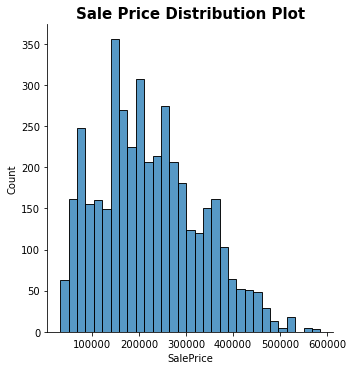

In [3]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(7, 7))
sns.displot(df['SalePrice'])
plt.title('Sale Price Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga apartemen Daegu di atas, terlihat bahwa terdapat 'right-skewed distribution'. Ini berarti terdapat skewness positif pada fitur SalePrice.

**Jumlah properti berdasarkan tipe Hallway**

In [4]:
print(f'Hallway Type terraced berjumlah', df[df['HallwayType']=='terraced'].count()['HallwayType'])
print(f'Hallway Type mixed berjumlah', df[df['HallwayType']=='mixed'].count()['HallwayType'])
print(f'Hallway Type corridor berjumlah', df[df['HallwayType']=='corridor'].count()['HallwayType'])

Hallway Type terraced berjumlah 2528
Hallway Type mixed berjumlah 1131
Hallway Type corridor berjumlah 464


In [5]:
# Cek median Sale price untuk tiap Hallway Type
df_median_saleprice = df.groupby(by=['HallwayType']).agg({'SalePrice':'median'}).reset_index()
df_median_saleprice = df_median_saleprice.set_index('HallwayType')
df_median_saleprice = df_median_saleprice.sort_values('SalePrice', ascending =False)
df_median_saleprice.head()

,SalePrice
HallwayType,
terraced,264601.0
mixed,153539.0
corridor,74557.0


Bisa dilihat harga median yang tertinggi berdasarkan hallwaytype adalah terraced diikuti oleh mixed dan yang terakhir corridor. 

In [6]:
# Mencari kolom yg berisi nilai numerikal
num_feature = [fea for fea in df.describe().columns]
len(num_feature)

8

Jumlah kolom yang berisi data numerikal adalah 8. Artinya, kolom-kolom tersebut sudah tidak perlu diolah/diencoding sebelum dilakukan permodelan.

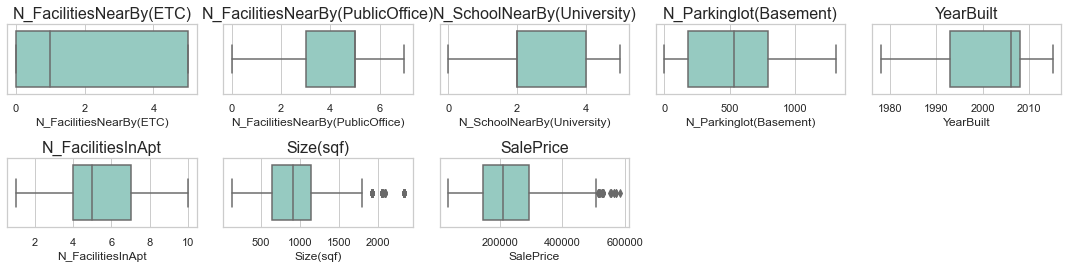

In [7]:
# Menunjukkan distribusi data tiap feature/kolom menggunakan boxplot
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(5,5, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


Dari boxplot diatas, dapat dilihat range Q1 dan Q3 pada setiap feature. Juga, beberapa kolom yang memiliki outlier. Apakah outlier ini akan digunakan atau dibuang akan dibahas pada tahap selanjutnya di data preprocessing.

## **3. Data Preprocessing**

Pada tahap ini, akan dilakukan cleaning pada data yang nantinya data yang sudah dibersihkan lalu digunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [8]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [9]:
# Cek datatipe tiap feature dan null value pada dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


### 3.1 Data Correlation

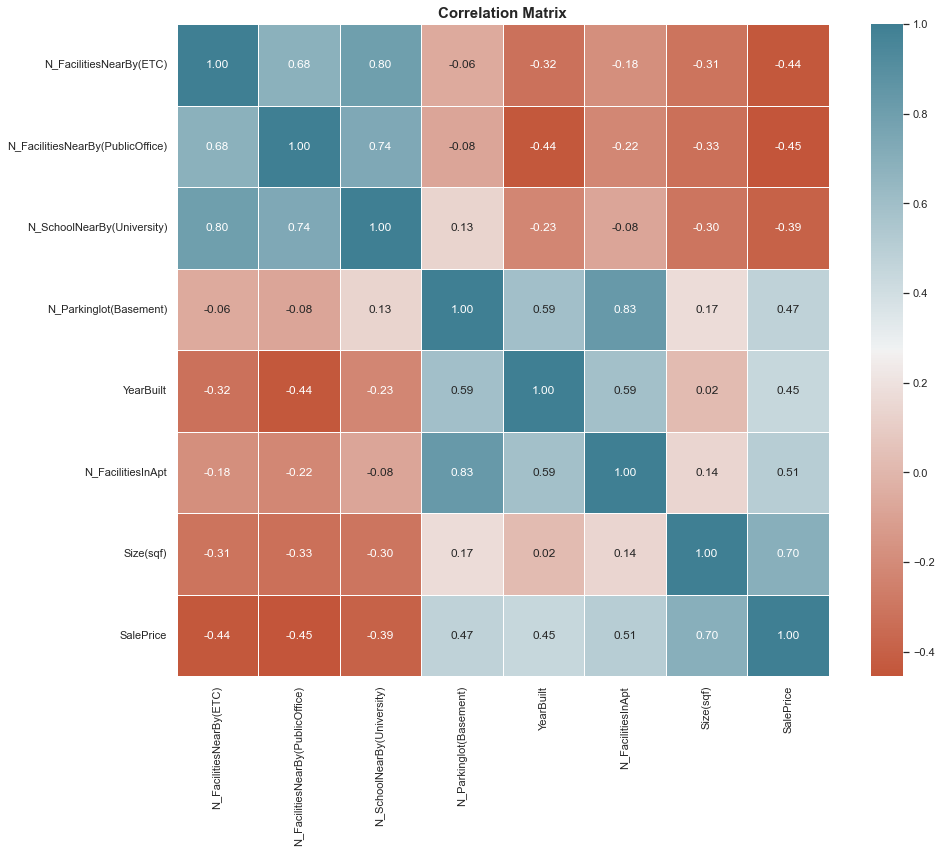

In [10]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Karena banyak terdapat **multicolinearity** antar feature, contohnya N_SchoolNearBy(University) dan N_FacilitiesNearby(PublicOffice) maka kita tidak akan menggunakan model linear regression pada dataset ini.

### 3.2 Data Outliers

Seperti sebelumnya ditunjukkan pada tahap EDA, tidak banyak terdapat outliers dalam dataset Daegu Apartemen. Outliers hanya terlihat terdapat pada feature Size(sqf) dan feature SalePrice.

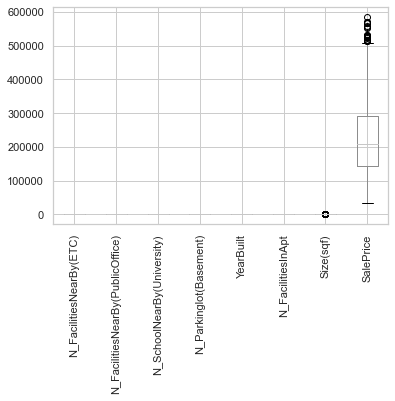

In [11]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

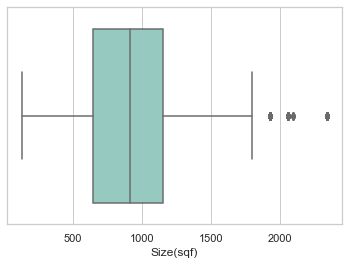

In [12]:
# Plot boxplot untuk mengecek outliers pada feature Size(sqf)
sns.boxplot(x=df_model['Size(sqf)']);

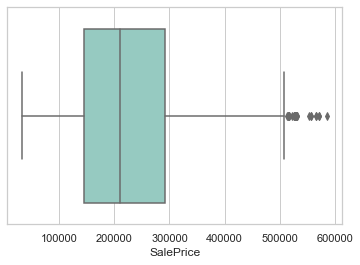

In [13]:
# Plot boxplot untuk mengecek outliers pada feature Size(sqf)
sns.boxplot(x=df_model['SalePrice']);

In [14]:
# Cek jumlah data untuk tiap kategori pada ketiga feature dibawah
nama_kolom = ['HallwayType','TimeToSubway', 'SubwayStation',]
for i in nama_kolom:
    print(i)
    print(df_model[i].value_counts())

HallwayType
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64
TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: TimeToSubway, dtype: int64
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64


In [15]:
# Cek jumlah unique value pada semua feature
listItem = []
for col in df_model.columns:
    x = df_model[col].value_counts().count()
    listItem.append(x)
    
pd.DataFrame(listItem, index = df_model.columns, columns = ['Jumlah Unique Values'])

,Jumlah Unique Values
HallwayType,3
TimeToSubway,5
SubwayStation,8
N_FacilitiesNearBy(ETC),4
N_FacilitiesNearBy(PublicOffice),8
N_SchoolNearBy(University),6
N_Parkinglot(Basement),20
YearBuilt,16
N_FacilitiesInApt,9
Size(sqf),89


In [16]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [17]:
# Outliers pada fitur Size(sqf)
find_anomalies(df_model['Size(sqf)'])

IQR: 505.0
limit_bawah: -113.5
limit_atas: 1906.5


In [18]:
df_model[df_model['Size(sqf)']>1906.5]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
106,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,243362
134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,424778
207,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,348283
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
288,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,300884
...,...,...,...,...,...,...,...,...,...,...,...
3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637
3977,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,383716
4027,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,193805
4074,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,254424


In [19]:
# Outliers pada fitur SalePrice
find_anomalies(df_model['SalePrice'])

IQR: 146398.0
limit_bawah: -74845.0
limit_atas: 510747.0


In [20]:
df_model[df_model['SalePrice']>510747.0].count()['SalePrice']

27

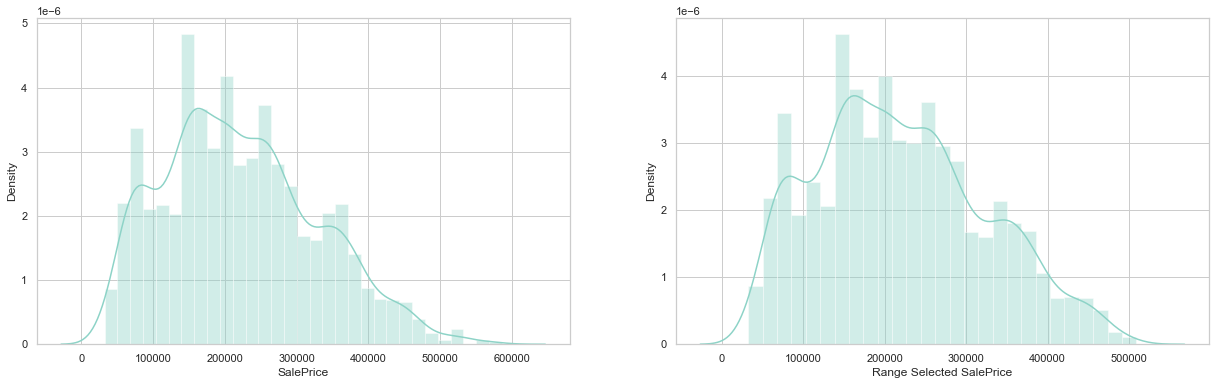

In [21]:
# Melakukan filtering pada data
df_model = df_model[(df_model['SalePrice'] <= 510747.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('SalePrice')
axes[1].set_xlabel('Range Selected SalePrice'); 

In [22]:
# Cek deskriptif statistik kolom 'SalePrice' setelah filtering
df_model['SalePrice'].describe()

count      4096.000000
mean     219692.548828
std      103961.039574
min       32743.000000
25%      144752.000000
50%      207964.000000
75%      287610.000000
max      508849.000000
Name: SalePrice, dtype: float64

## **4. Modeling**

In [23]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### 4.1 Encoding

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [24]:
# cek kategori-kategori ordinal yang terdapat pada feature 'TimeToSubway'
df_model['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [25]:
# ordinal mapping
ordinal_mapping = [
    {'col':'TimeToSubway', 'mapping':{'0-5min':5, '5min~10min':10, '10min~15min':15, '15min~20min':20, 'no_bus_stop_nearby':0}}
] 

In [26]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType', 'SubwayStation']),
    ('Ordinal', ce.OrdinalEncoder(), ['TimeToSubway'])
], remainder='passthrough')

### 4.2 Data Splitting

In [27]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

### 4.3 Train and Test Splitting

In [28]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

### 4.4 Choose a Benchmark Model

In [29]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54044.1414728  -55739.71895647 -56447.19262077 -52137.43557332
 -52951.17975787] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42201.73070759 -44779.4144717  -45732.81516951 -41939.18389972
 -42464.50750445] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22684392 -0.23977419 -0.22737554 -0.21891346 -0.22374728] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-45795.24942482 -45689.52615737 -48812.26824823 -45182.39657944
 -46536.695051  ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-35519.75631094 -34272.55416097 -37206.06718875 -34867.27736
 -35331.95636144] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
   

In [30]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-54263.933676,1627.156259,-43423.530351,1535.384102,-0.227331,0.006910
1,KNN Regressor,-46403.227092,1279.900465,-35439.522276,982.646191,-0.191318,0.007554
2,DecisionTree Regressor,-42654.278454,889.710513,-32902.426379,772.751555,-0.173245,0.005684
3,RandomForest Regressor,-42586.970692,952.341499,-32859.970224,788.452831,-0.173170,0.005634
4,XGBoost Regressor,-42605.317429,965.611870,-32856.149651,825.321632,-0.172943,0.005913


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu RandomForest dan XGBoost

### 4.5 Predict to Test Set with the Benchmark Model

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [31]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,42478.452148,33781.105840,0.182856
RandomForest,42545.790475,33797.250652,0.183108


- Ketika dilakukan prediksi pada test set, performa XGBoost sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


### 4.6 Hyperparameter Tuning

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [32]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [33]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state = 1  
)

In [34]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [35]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
22,0.584625,0.020011,0.027437,0.006292,0.7,0.002783,155,4,0.25,8,...,710.607767,3,-0.194449,-0.174999,-0.179744,-0.177143,-0.182179,-0.181703,0.006816,7
17,1.270742,0.032639,0.026146,0.007546,0.6,0.001,190,5,0.04,9,...,764.315130,2,-0.192376,-0.175930,-0.181521,-0.175765,-0.183298,-0.181778,0.006084,8
23,0.570629,0.030174,0.021249,0.001010,0.9,3.593814,153,4,0.33,9,...,747.810834,4,-0.193952,-0.175239,-0.181254,-0.175631,-0.182375,-0.181690,0.006772,6
16,0.581984,0.034301,0.020683,0.003265,0.8,0.16681,190,3,0.48,9,...,712.733691,13,-0.194464,-0.175264,-0.181540,-0.175297,-0.183391,-0.181991,0.007040,10
48,0.650022,0.037467,0.023141,0.004834,0.5,0.007743,195,4,0.35,9,...,702.623787,5,-0.193745,-0.176046,-0.180344,-0.174684,-0.183109,-0.181586,0.006783,4


In [36]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -42340.539333842295
Best_params: {'model__subsample': 0.7, 'model__reg_alpha': 0.0027825594022071257, 'model__n_estimators': 155, 'model__max_depth': 4, 'model__learning_rate': 0.25, 'model__gamma': 8, 'model__colsample_bytree': 0.3}


### 4.7 Predict to Test Set with the Tuned Model

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [37]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42390.041437,33613.403601,0.181155


### 4.8 Performance Comparison

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [38]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,42478.452148,33781.10584,0.182856


In [39]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,42390.041437,33613.403601,0.181155


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 42478.452, 33781.105, 0.182
- RMSE, MAE & MAPE setelah tuning: 42390.041, 33613.403, 0.181

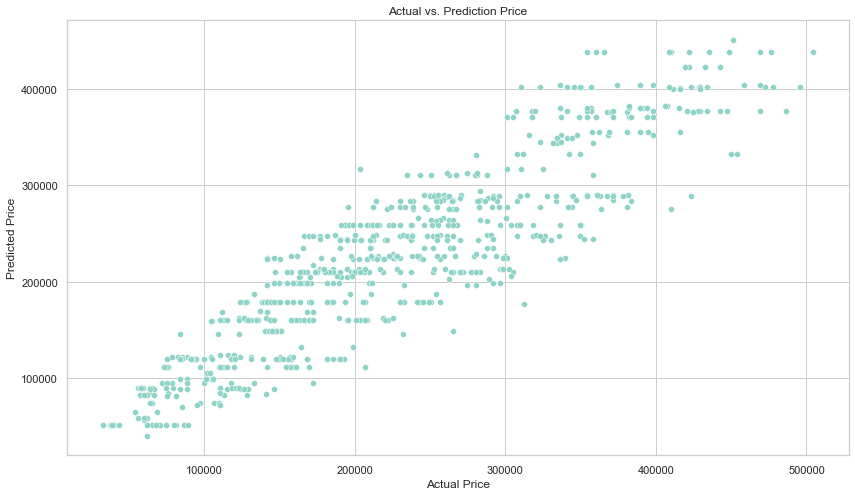

In [40]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

### 4.9 Feature Importances

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

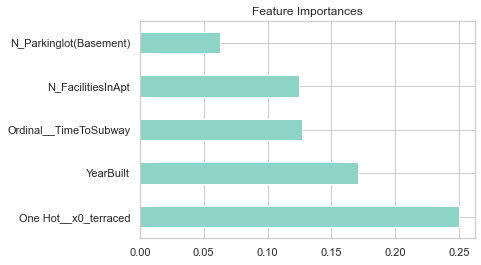

In [41]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## **5. Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'HallwayType' dan 'YearBuilt' menjadi fitur yang paling berpengaruh terhadap 'SalePrice'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~18%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga apartemen di kota Daegu pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD 510,747), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar ~18% dari harga yang mungkin seharusnya. Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh kurangnya fitur pada dataset yang bisa merepresentasikan aspek dari properti/apartemen yang ada di Daegu seperti Floor (apartemen terletak pada lantai berapa), HeatingType (tipe pemanas yang berada di unit), jumlah berbagai macam tingkat sekolah (pada dataset ini hanya memiliki feature universitas, bisa ditambahkan untuk tingkat elementary; junior high school; high school etc.)



## **6. Recommendation**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:
  
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('SalePrice'), seperti Floor. Selain itu, adanya penambahan data terkini untuk apartemen di kota Daegu tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
2. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan. Patut diingat, semakin kompleks suatu model, interpretasi akan semakin sulit
<br><br>   
3. Menganalisa data-data yang memiliki eror tinggi saat diprediksi dengan model kita, lalu melakukan analisa hubungan antara eror  tersebut dengann setiap variable independen. Kita berharap untuk mengetahui sebenarnnya variable mana saja yang menyebabkan error yang tinggi.

****

#### **Save Model**

In [42]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Daegu_Apartment_XGB.sav', 'wb'))

In [44]:
# Load model
filename = 'Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [45]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

42478.45214760878